In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2
import bdf22D as bdf2

## Mesh creation

In [2]:
mesh = BoxMesh(Point(-1, -1, 0), Point(1, 1, 1), 20, 20, 20)
# mesh = UnitCubeMesh(10, 10, 10)
V = FunctionSpace(mesh,"P",1)

## Test Case


In [3]:
m0 = 1e-3
dt = 0.5
T = 150
save_interval = 2
times = [] #[0,7/dt,14/dt,21/dt,28/dt]
doses = [] #10*np.ones_like(times)  
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.008),degree=2)
# n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/V1.5e5_T350_ref20x20_bdf2"

solver = bdf2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()


Solving linear variational problem.
iter=1: norm=0.871627
Solving linear variational problem.
iter=2: norm=2.49962e-05
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=2.07878e-09
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=1.67622e-05
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=1.86449e-05
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=2.18906e-05
Solving linear variational problem.
time=2.5: 
Solving linear variational problem.
iter=1: norm=2.60171e-05
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=3.09425e-05
Solving linear variational problem.
time=3.5: 
Solving linear variational problem.
iter=1: norm=3.67069e-05
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=4.33937e-05
Solving linear variationa

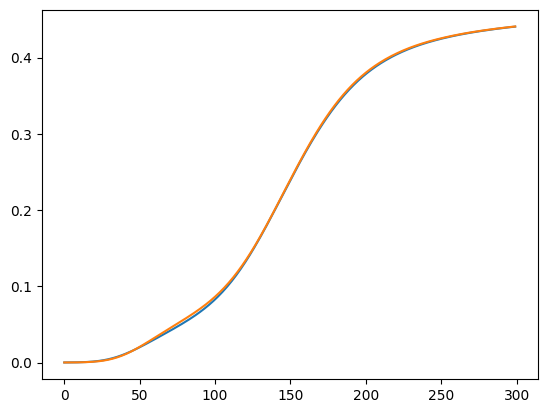

In [5]:
path_sol = "solutions/V3e5_T150_ref20x20/"
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)
mass2 = np.load("solutions/V1.5e5_T350_ref20x20_bdf2/mass.npy")
plt.plot(mass2)
# plt.xlim([3,80])


In [3]:
dt = 0.5
T = 40
save_interval = 2
c0file = XDMFFile('solutions/V1.5e5_T350_ref20x20//c.xdmf')
n0file = XDMFFile('solutions/V1.5e5_T350_ref20x20//n.xdmf')
V = FunctionSpace(mesh,"P",1)
c0 = Function(V)
n0 = Function(V)
c0file.read_checkpoint(c0,"c",69)
n0file.read_checkpoint(n0,"n",69)
times = [0+1,1+1,2+1,3+1,4+1,7+1,8+1,9+1,10+1,11+1,14+1,15+1,16+1,17+1,18+1,21+1,22+1,23+1,24+1,25+1,28+1,29+1,30+1,31+1,32+1]
doses = 2*np.ones_like(times)
# times = [0,7,14,21,28]
# doses = 10*np.ones_like(times)

path_sol = "solutions/lowoxygen_uhfrt_T40_bdf2"

solver = bdf2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()

Solving linear variational problem.
iter=1: norm=1.75259e-06
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=1.12006e-06
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=0.00447284
Solving linear variational problem.
iter=2: norm=0.00203917
Solving linear variational problem.
iter=3: norm=0.00129549
Solving linear variational problem.
iter=4: norm=0.00082226
dose
2
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=0.00185178
Solving linear variational problem.
iter=2: norm=0.00115796
Solving linear variational problem.
iter=3: norm=0.000740035
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=0.0111131
Solving linear variational problem.
iter=2: norm=0.00698977
Solving linear variational problem.
iter=3: norm=0.00443858
Solving linear variational problem.
iter=4: norm=0.00278858
Solving linear variational 

0.2548165072289984
0.25373172872804706
0.2567875625441797
0.2620190622876898
0.26649841854487233
0.27016314706020217
0.27321292465112523
0.2725435831062088
0.270013845297546
0.2710677085880723
0.27414295695676005
0.27699081566296874
0.27938437603831345
0.28148372831515484
0.28011587920561337
0.2769217785106613
0.2773256730342616
0.2797037057331571
0.2819715719257925
0.2839231729494029
0.2856741536262781
0.28394893372629276
0.28051641638481417
0.28056776319521154
0.28257944869408247
0.2845625218667364
0.2863314354179618
0.2878751218898917
0.28596718767688806
0.28238570508711397
0.2823166098965508
0.2842259634173803
0.2861364825411909
0.28778095778616697
0.2891718286376864
0.28714704301289257
0.283488688384171
0.28009588064892116
0.2772498664942533
0.27475896741145583


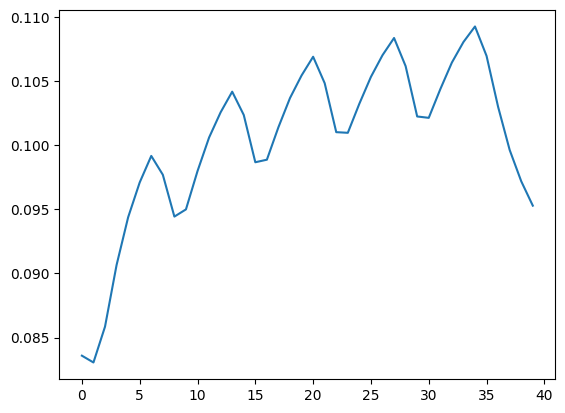

In [5]:
# oxygen level test case 1
c = Function(V)
cfile = XDMFFile(path_sol + '/c.xdmf')
ctot = []
for i in range(40):
    cfile.read_checkpoint(c,"c",i)
    print(c.vector().max())
    ctot.append(assemble(c*dx))
plt.plot(ctot)

0.9852032297502854 2.8030377798480035e-07 8.89667602989439e-09


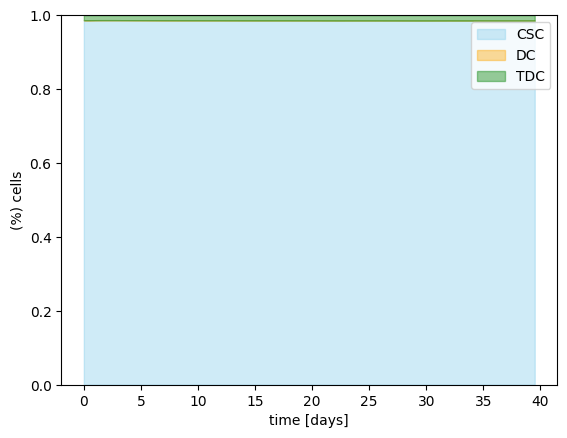

In [7]:
path_sol = "solutions/lowoxygen_uhfrt_T40_bdf2"
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,40,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
print(csc[-1],dc[-1],tdc[-1])

## Comparison

In [17]:
path_sol1 = "../Model3D/solutions/t400_masses"
mesh2 = IntervalMesh(20,0,1)
V2 = FunctionSpace(mesh2,"P",1)
c = Function(V2)
cfile = XDMFFile(path_sol1 + '/c.xdmf')
c1 = []
for i in range(50,200,2):
    cfile.read_checkpoint(c,"c",i)
    c1. append(c.vector().min())
    # ctot.append(assemble(c*dx))

In [18]:
path_sol2 = "../Model1D/solutions/B_Km0.005"
mesh2 = UnitSquareMesh(20,20)
V2 = FunctionSpace(mesh2,"P",2)
c = Function(V2)
cfile = XDMFFile(path_sol2 + '/c.xdmf')
c2 = []
for i in range(25,100):
    cfile.read_checkpoint(c,"c",i)
    c2.append(c.vector().min())

In [16]:
cdiff = np.array(c1)-np.array(c2)
print(np.mean(cdiff),np.std(cdiff))

0.05652293498010914 0.0228555671849544


0.06452651687726337 0.020778162278811876


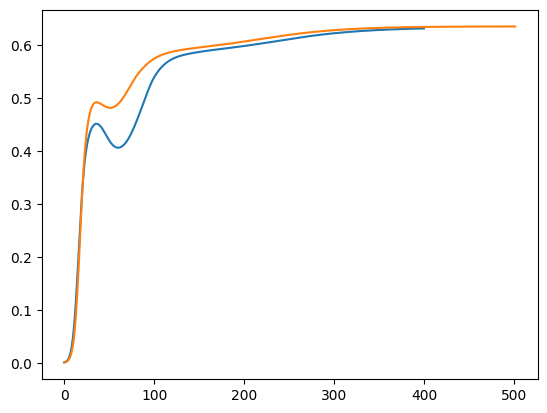

In [29]:
mass1 = np.load(path_sol1 + '/mass.npy')
time1 = np.arange(0,400,0.5)
mass2 = np.load(path_sol2 + '/mass.npy')
time2 = np.arange(0,501,0.1)
plt.plot(time1,mass1)
plt.plot(time2,mass2)
# print(mass1[50:200])
x = np.arange(250,1000,5)
print(np.mean(mass2[x] - mass1[50:200]),np.std(mass2[x] - mass1[50:200]))
